shape before PCA   (150, 4)
shape after PCA   (150, 2)


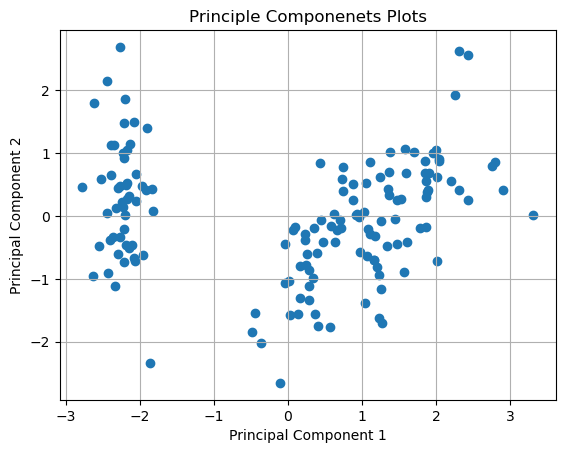

In [1]:
# Important Libraries

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

iris=load_iris()

#Convert it to a dataframe
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)

#Scaling the features using Standrad Scaler with mean =0 and variance 1
scaled_data=StandardScaler().fit_transform(df)


#Dimentionality Reduction using PCA with 80 % variance
pca=PCA(0.8)
data_pca=pca.fit_transform(scaled_data)
df_=pd.DataFrame(data_pca)

#Shape after dimentionality reduction
print('shape before PCA  ', df.shape)

#Shape after dimentionality reduction
print('shape after PCA  ', df_.shape)

#PC1 and PC2 plot
plt.scatter(df_[0], df_[1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principle Componenets Plots')
plt.grid(True)
plt.show()

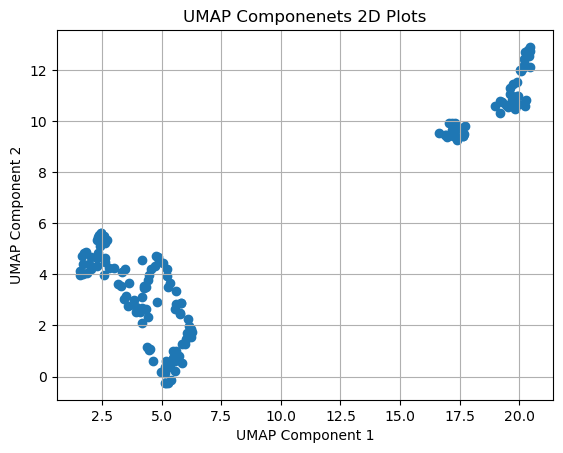

In [2]:
#Applying UMAP (Uniform Manifold Approximation and Projection)  another powerful dimention reduction technique

#installation
#!pip install umap-learn

import umap


umap = umap.UMAP(n_components=2) # Two components
umap_data = umap.fit_transform(scaled_data) # You  need scaled data
df_umap=pd.DataFrame(umap_data)

plt.scatter(df_umap[0], df_umap[1])
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Componenets 2D Plots')
plt.grid(True)
plt.show()

In [3]:
# Droping Higly Correlated Features
import numpy as np 

df_scaled=pd.DataFrame(scaled_data)
corr_matrix=df_scaled.corr()

#Upper Traingle of the correlated matrix

# Create an empty DataFrame to store the upper triangle matrix wo diangonal elements
upper_tri = pd.DataFrame(np.nan, index=corr_matrix.index, columns=corr_matrix.columns)

for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if i < j:
            upper_tri.iloc[i,j]=corr_matrix.iloc[i,j]
            
#### To determine strongly correlated features

ths_value=0.8
to_drop=[]

for column in upper_tri.columns:
    if any(upper_tri[column] > ths_value):
        to_drop.append(column)

# Drop features
df_reduced = df_scaled.drop(to_drop, axis=1)

print()
print('Reduced Matrix after removing strongly corr features')

df_reduced


Reduced Matrix after removing strongly corr features


,0,1
0,-0.900681,1.019004
1,-1.143017,-0.131979
2,-1.385353,0.328414
3,-1.506521,0.098217
4,-1.021849,1.249201
...,...,...
145,1.038005,-0.131979
146,0.553333,-1.282963
147,0.795669,-0.131979
148,0.432165,0.788808


/Users/sourav/.pyenv/versions/anaconda3-2023.09-0/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sourav/.pyenv/versions/anaconda3-2023.09-0/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sourav/.pyenv/versions/anaconda3-2023.09-0/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sourav/.pyenv/versions/anaconda3-2023.09-0/lib/python3.11/si

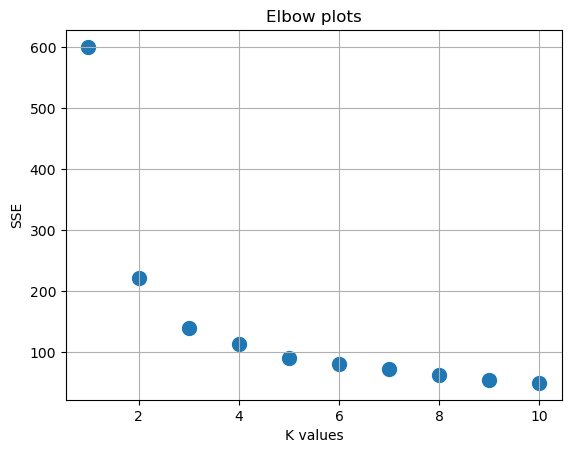

The optimal number of clusters determined by the Elbow method is: 3


/Users/sourav/.pyenv/versions/anaconda3-2023.09-0/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sourav/.pyenv/versions/anaconda3-2023.09-0/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sourav/.pyenv/versions/anaconda3-2023.09-0/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sourav/.pyenv/versions/anaconda3-2023.09-0/lib/python3.11/si

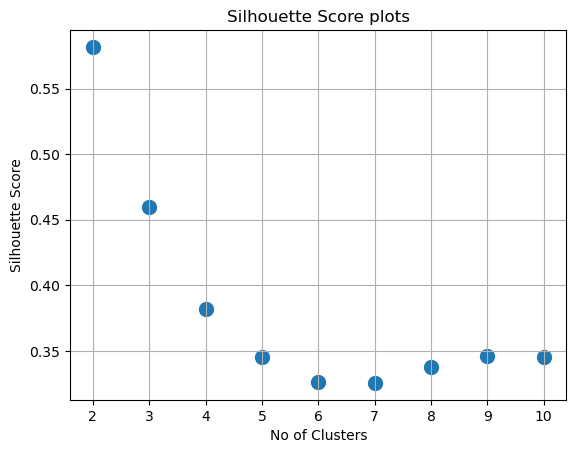

The optimal number of clusters determined by the silhouette score is: 2


In [4]:
# Using K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


#Deciding the K-values or Number of cluster 
k_range=np.arange(1,11)

SSE=[]
#Using Elbow technique
for k in k_range:
    kmeans=KMeans(n_clusters=k)
    km=kmeans.fit(scaled_data)
    SSE.append(km.inertia_)
    
#Plot SUM SQUARED ERROR (SSE) 
plt.scatter(k_range, SSE, s=100)
plt.xlabel('K values')
plt.ylabel('SSE')
plt.title('Elbow plots')
plt.grid(True)
plt.show()

print(f"The optimal number of clusters determined by the Elbow method is: 3")


#Using Silhouette Score
silhouette_scores=[]
k_range=np.arange(2,11)
for k in k_range:
    kmeans=KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

#Plot Silhouette Score
plt.scatter(k_range, silhouette_scores, s=100)
plt.xlabel('No of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score plots')
plt.grid(True)
plt.show()

# Determine the optimal k value
#higher value indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters.
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters determined by the silhouette score is: {optimal_k}")

/Users/sourav/.pyenv/versions/anaconda3-2023.09-0/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


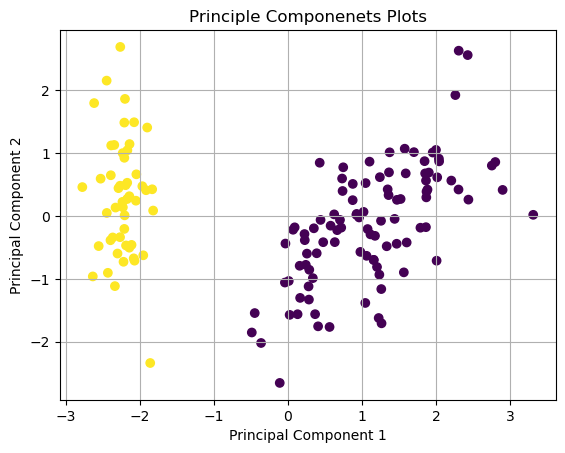

In [5]:
#Evaluation and Visualization

#We will reduce it to 2 components (PCA) for better visulas 
pca=PCA(n_components=2)
data_pca=pca.fit_transform(scaled_data)
df_=pd.DataFrame(data_pca)

#Using optimal cluster
kmeans=KMeans(n_clusters=optimal_k)
cluster_labels = kmeans.fit_predict(scaled_data)
df_['labels']=cluster_labels

#PC1 and PC2 plot
plt.scatter(df_[0], df_[1], c=df_['labels'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principle Componenets Plots')
plt.grid(True)
plt.show()


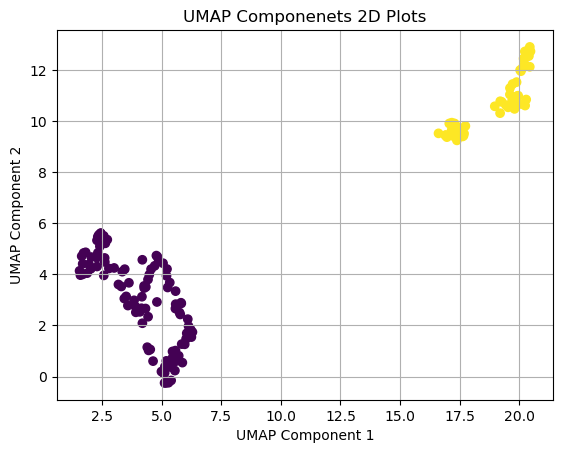

In [6]:
#Evaluation and Visualization
df_umap['labels']=cluster_labels

plt.scatter(df_umap[0], df_umap[1], c=df_umap['labels'])
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Componenets 2D Plots')
plt.grid(True)
plt.show()